<a href="https://colab.research.google.com/github/axe-n/tvm/blob/main/Copy_of_NLD_DEMONSTRATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
t = 4
h = 0.001
y0 = 1
timesteps = int(t / h)

for i in range(timesteps):
    dydt = y0
    y0 = y0 + h * dydt

print(y0)

54.4891354543037


In [ ]:
t = 4
h = 0.01
y0 = 1
timesteps = int(t / h)

for i in range(timesteps):
    k1 =(y0)
    k2 =(y0 + 0.5 *h* k1)
    k3 =(y0 + 0.5 *h* k2)
    k4 =(y0 + h*k3)

    y0 = y0 + h*(k1 + 2*k2 + 2*k3 + k4) / 6  # RK4 update step

print(y0)


54.59815001509595


Enter the value of a: 4
Enter simulation end time: 12
Enter initial x: 3
Enter initial y: 2


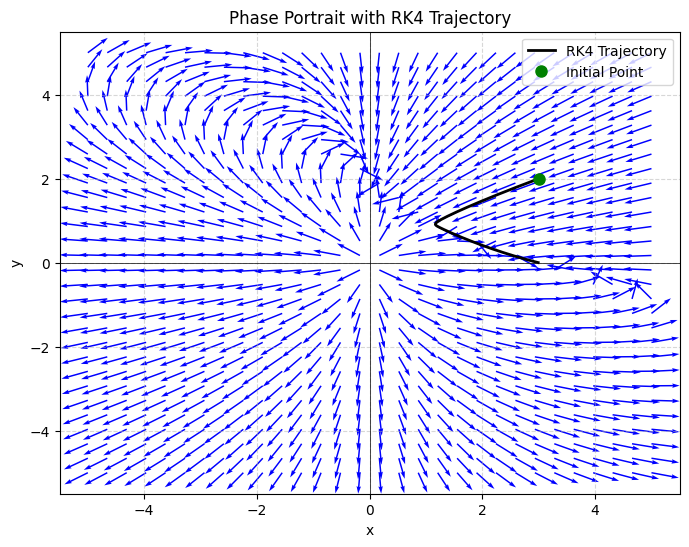

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = float(input("Enter the value of a: "))
t_end = float(input("Enter simulation end time: "))
state = np.array([float(input("Enter initial x: ")), float(input("Enter initial y: " ))])

# The equations to be solved
def system(state):
    X, Y = state
    dxdt = X*(3-X-2*Y)
    dydt = Y*(2-X-Y)
    return np.array([dxdt, dydt])

# RK4
def rk4_step(state, dt):
    k1 = dt * system(state)
    k2 = dt * system(state + 0.5 * k1)
    k3 = dt * system(state + 0.5 * k2)
    k4 = dt * system(state + k3)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

dt = 0.01
num_steps = int(t_end / dt)



trajectory = np.empty((num_steps + 1, 2))
trajectory[0] = state


for i in range(num_steps):
    state = rk4_step(state, dt)
    trajectory[i+1] = state

#from here  we allocate a vector to each point in the space , for this purpose we use quiver plot
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute the vector field
U = X*(3-X-2*Y)
V = Y*(2-X-Y)

# Normalize for uniform arrow lengths
M = np.hypot(U, V)
U /= M
V /= M

# Plot the quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, color='b', angles='xy', scale_units='xy', scale=2)

# Plot the RK4 trajectory on top of the vector field
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', lw=2, label='RK4 Trajectory')
plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=8, label='Initial Point')

# Additional plot formatting
plt.xlabel("x")
plt.ylabel("y")
plt.title("Phase Portrait with RK4 Trajectory")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


In [ ]:
""" Plot the streamplot of the vector field.
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, U, V, color=np.sqrt(U**2 + V**2), linewidth=1,density=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("stream_plot")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True, linestyle="--", alpha=1)
plt.show()
"""
print("welcome")

welcome
